In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 15.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


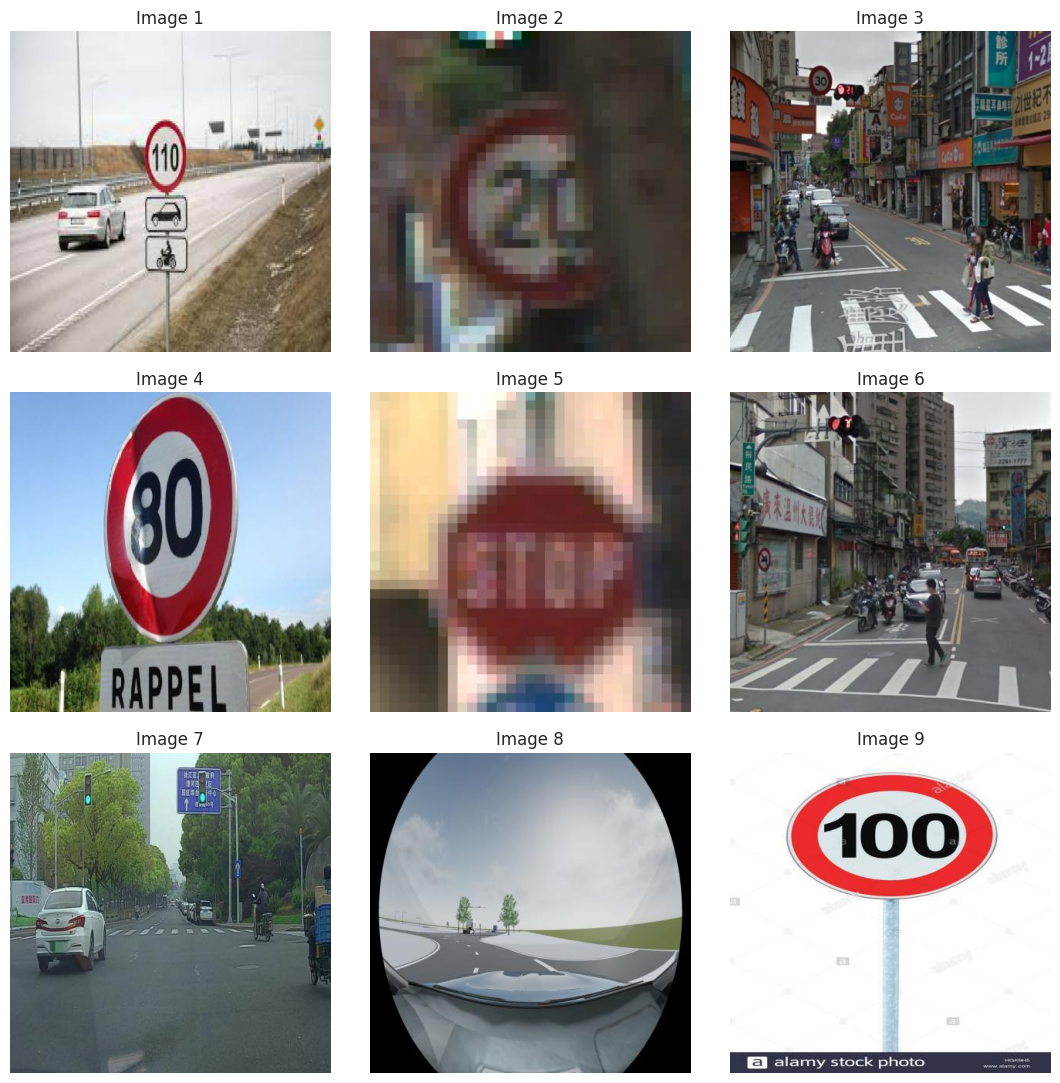

In [3]:

Image_dir='/kaggle/input/cardetection/car/train/images'
num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)


fig, axes = plt.subplots(3, 3, figsize=(11, 11))
for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.tight_layout()    
plt.show()

In [4]:
image=cv2.imread('/kaggle/input/cardetection/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg')
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.0MB/s]



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 7.9ms
Speed: 10.4ms preprocess, 7.9ms inference, 60.3ms postprocess per image at shape (1, 3, 640, 640)


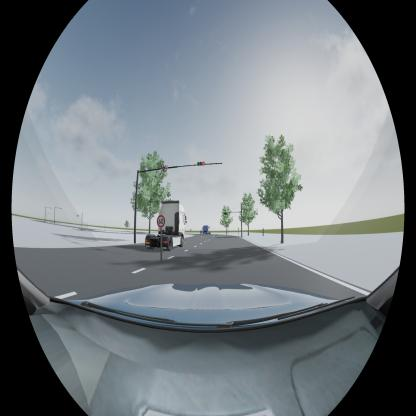

In [5]:
model = YOLO("yolov8n.pt") 


image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [6]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 MB 24.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [7]:
Final_model = YOLO('yolov8n.pt')  
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics YOLOv8.2.100 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-09-24 16:23:52,978	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-24 16:23:53,217	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.11G reserved, 0.07G allocated, 14.56G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.206         26.68         70.26        (1, 3, 640, 640)                    list
     3013773       16.42         0.308         19.55         25.75        (2, 3, 640, 640)                    list
     3013773       32.84         0.558         20.07          29.8        (4, 3, 640, 640)                    list
     3013773       65.67         1.015         25.82         36.96        (8, 3, 640, 640)                    list
     3013773       131.3         1.944         37.46         47.94       (16, 3, 640, 640)                    list
Aut

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:19<00:00, 184.57it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 190.96it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000578125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.51G     0.8954      3.827      1.231        123        640: 100%|██████████| 48/48 [00:36<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        801        944     0.0355      0.756      0.123      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.44G      0.729      2.659      1.087        118        640: 100%|██████████| 48/48 [00:35<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.292      0.448      0.297      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.45G     0.7336      2.249      1.072        110        640: 100%|██████████| 48/48 [00:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.374      0.561      0.438      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       9.5G     0.7038      1.943       1.06        115        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.465      0.546      0.529      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.44G     0.6804      1.644      1.038        117        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.664      0.609      0.692      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.44G     0.6637      1.405      1.026        114        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]

                   all        801        944      0.745      0.716      0.794      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.44G     0.6589      1.304      1.024        111        640: 100%|██████████| 48/48 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.823      0.729      0.829      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.44G      0.646      1.173      1.012        119        640: 100%|██████████| 48/48 [00:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944       0.76      0.726      0.808      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.44G     0.6365      1.093       1.01        102        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.905      0.731      0.857      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.45G     0.6125       1.01     0.9963        121        640: 100%|██████████| 48/48 [00:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        801        944      0.865      0.773       0.86      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.45G     0.6218     0.9669      1.001        102        640: 100%|██████████| 48/48 [00:36<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.906      0.817      0.892      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.44G     0.6015      0.922     0.9896        104        640: 100%|██████████| 48/48 [00:36<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.898      0.838      0.901      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       9.5G     0.6058      0.879     0.9935        116        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944      0.916      0.817      0.907      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.47G     0.5924     0.8181     0.9866        124        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.901      0.851      0.923      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.44G     0.5874     0.8161     0.9841        117        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.881      0.837      0.902      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       9.5G      0.574     0.7988     0.9765        112        640: 100%|██████████| 48/48 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.909      0.875      0.937      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.44G     0.5741     0.7469     0.9743        123        640: 100%|██████████| 48/48 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.931      0.844      0.928      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       9.5G     0.5631      0.742     0.9724        116        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.939      0.844       0.93      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.45G     0.5572     0.7194     0.9725        109        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.929       0.86      0.938      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.45G     0.5425     0.6832     0.9607        113        640: 100%|██████████| 48/48 [00:33<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.933      0.883      0.942       0.81


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.42G     0.5577     0.5411     0.9379         60        640: 100%|██████████| 48/48 [00:36<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.879      0.888      0.933      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.39G     0.5457     0.4969     0.9357         66        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.922      0.867      0.937      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.39G     0.5287     0.4729     0.9249         59        640: 100%|██████████| 48/48 [00:32<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.935      0.889       0.95      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.39G     0.5277     0.4558     0.9201         68        640: 100%|██████████| 48/48 [00:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.938      0.878      0.947      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       9.5G     0.5251     0.4455     0.9194         65        640: 100%|██████████| 48/48 [00:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944       0.96      0.888      0.955       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.42G     0.5111     0.4212      0.907         62        640: 100%|██████████| 48/48 [00:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.967      0.877      0.959      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.39G     0.5026     0.4068     0.9124         64        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.954      0.902      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.39G     0.4982     0.3989     0.9032         67        640: 100%|██████████| 48/48 [00:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        801        944      0.963      0.883      0.958      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.39G     0.4952     0.3851     0.9021         66        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.962      0.899      0.961      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.39G     0.4888     0.3763     0.9019         66        640: 100%|██████████| 48/48 [00:33<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944       0.97      0.897      0.964      0.836



30 epochs completed in 0.339 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.100 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]


                   all        801        944      0.971      0.897      0.964      0.835
           Green Light         87        122      0.927      0.689      0.857      0.511
             Red Light         74        108      0.925      0.687      0.835      0.532
       Speed Limit 100         52         52      0.965      0.923      0.985      0.895
       Speed Limit 110         17         17      0.976      0.941      0.978      0.906
       Speed Limit 120         60         60      0.988      0.983      0.992       0.92
        Speed Limit 20         56         56       0.99      0.982      0.986      0.875
        Speed Limit 30         71         74       0.96      0.959      0.986       0.93
        Speed Limit 40         53         55      0.961      0.927      0.989      0.882
        Speed Limit 50         68         71      0.999      0.887      0.973       0.87
        Speed Limit 60         76         76      0.975      0.921       0.97       0.88
        Speed Limit 7

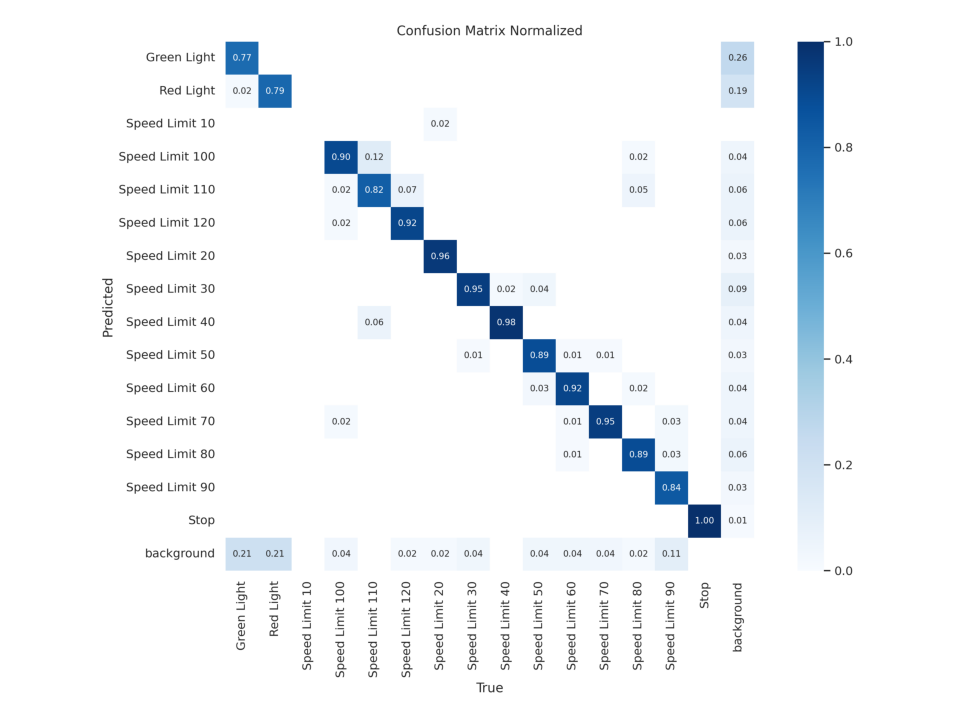

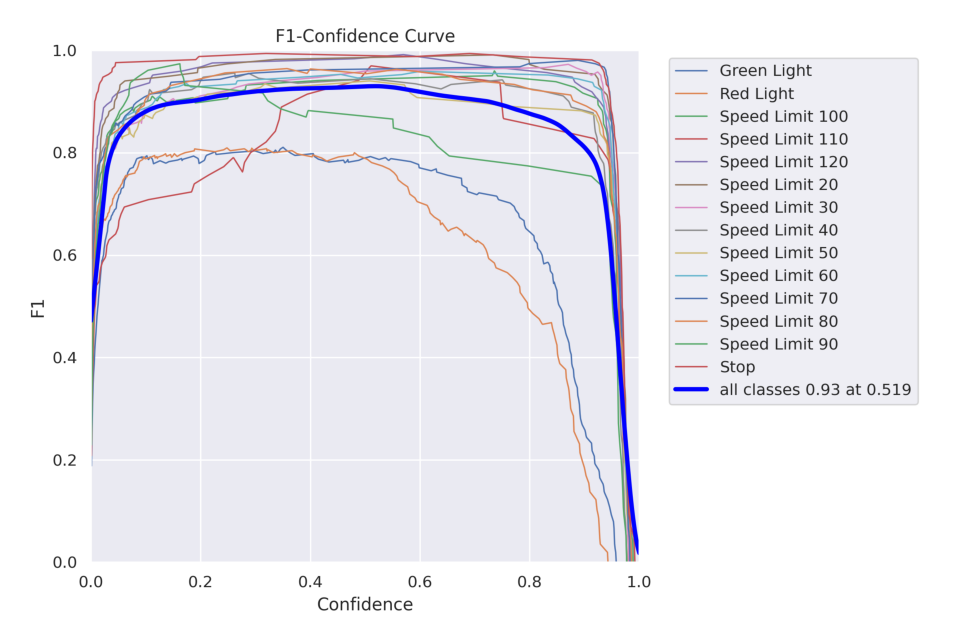

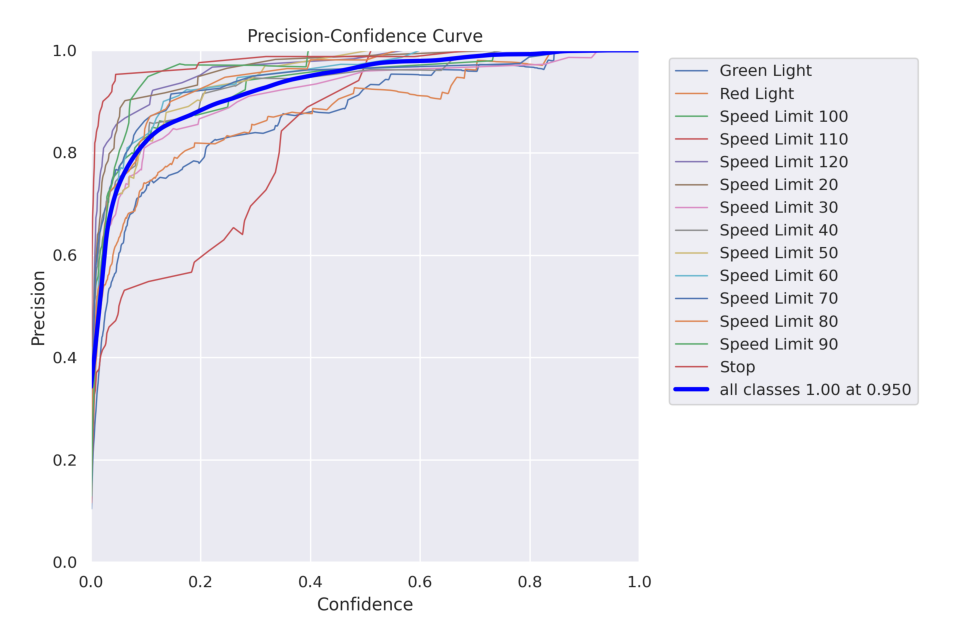

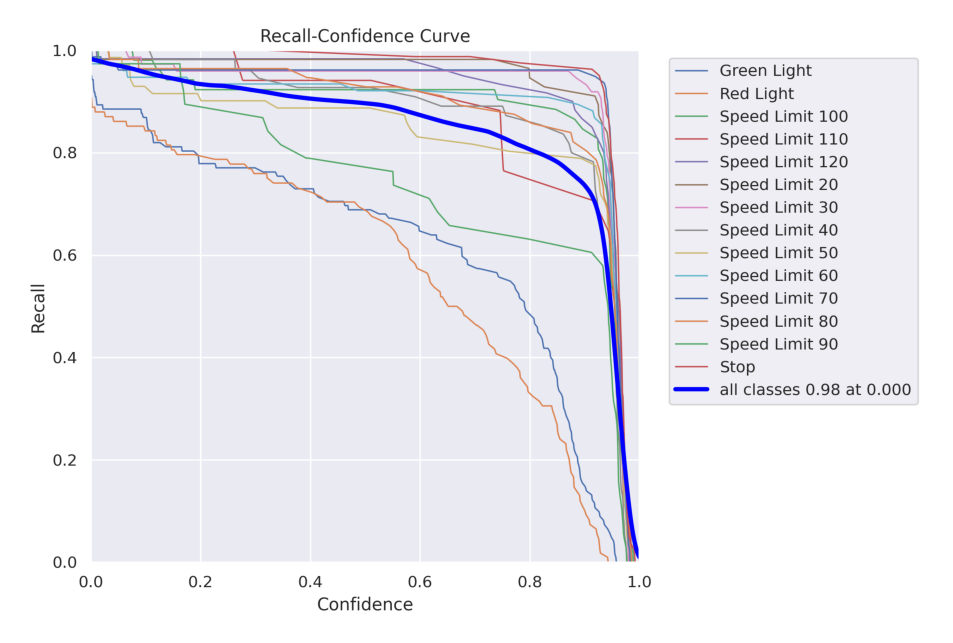

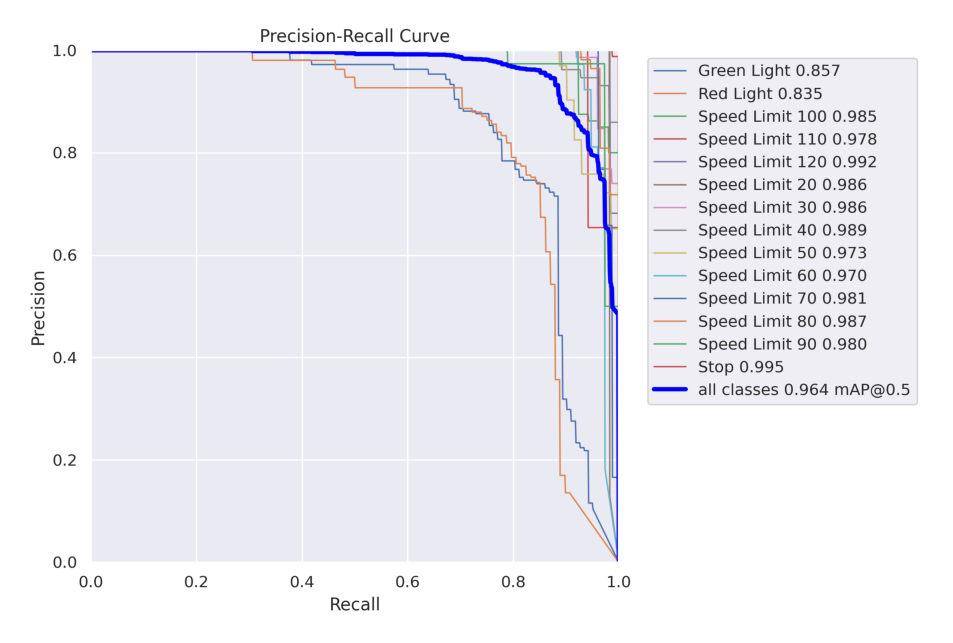

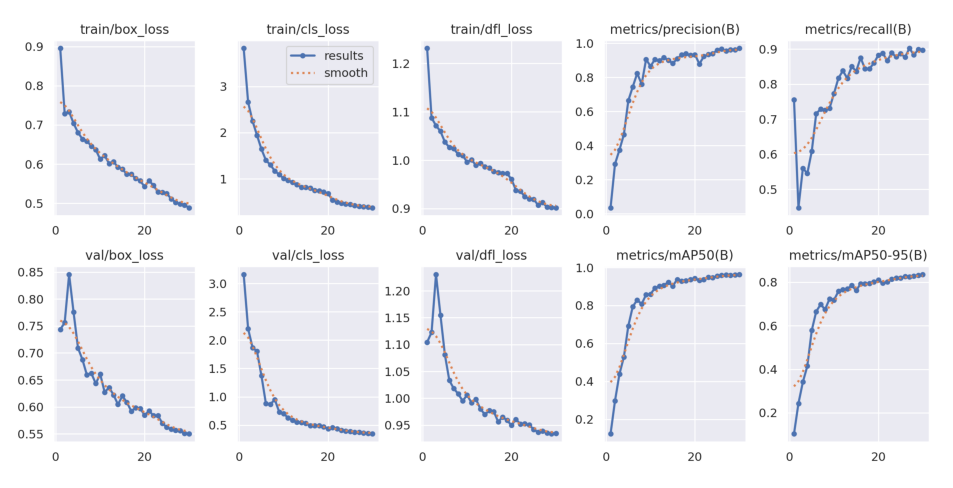

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [10]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch        train/box_loss        train/cls_loss  \
20                    21               0.55766               0.54106   
21                    22               0.54568               0.49686   
22                    23               0.52875               0.47289   
23                    24               0.52770               0.45580   
24                    25               0.52511               0.44553   
25                    26               0.51106               0.42122   
26                    27               0.50255               0.40678   
27                    28               0.49815               0.39892   
28                    29               0.49522               0.38509   
29                    30               0.48880               0.37630   

          train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
20               0.93793               0.87871               0.88839   
21               0.93575               0.92197               0.86688   
22               0.92491               0.93472               0.88926   
23               0.92007               0.93842               0.87787   
24               0.91937               0.95970               0.88769   
25               0.90698               0.96663               0.87697   
26               0.91243               0.95411               0.90245   
27               0.90322               0.96251               0.88340   
28               0.90213               0.96235               0.89912   
29               0.90189               0.97030               0.89695   

        metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
20               0.93300               0.79544               0.59261   
21               0.93688               0.80173               0.58369   
22               0.94967               0.81396               0.58375   
23               0.94685               0.81885               0.56964   
24               0.95475               0.82012               0.56204   
25               0.95908               0.82704               0.55838   
26               0.96203               0.82494               0.55665   
27               0.95826               0.82872               0.55580   
28               0.96131               0.83232               0.55080   
29               0.96382               0.83593               0.55008   

            val/cls_loss          val/dfl_loss                lr/pg0  \
20               0.45240               0.96079              0.000179   
21               0.43243               0.95200              0.000161   
22               0.40874               0.95291              0.000144   
23               0.39410               0.95009              0.000127   
24               0.38500               0.94212              0.000109   
25               0.37598               0.93644              0.000092   
26               0.37397               0.93908              0.000075   
27               0.36196               0.93513              0.000057   
28               0.35088               0.93382              0.000040   
29               0.34589               0.93450              0.000023   

                  lr/pg1                lr/pg2  
20              0.000179              0.000179  
21              0.000161              0.000161  
22              0.000144              0.000144  
23              0.000127              0.000127  
24              0.000109              0.000109  
25              0.000092              0.000092  
26              0.000075              0.000075  
27              0.000057              0.000057  
28              0.000040              0.000040  
29              0.000023              0.000023

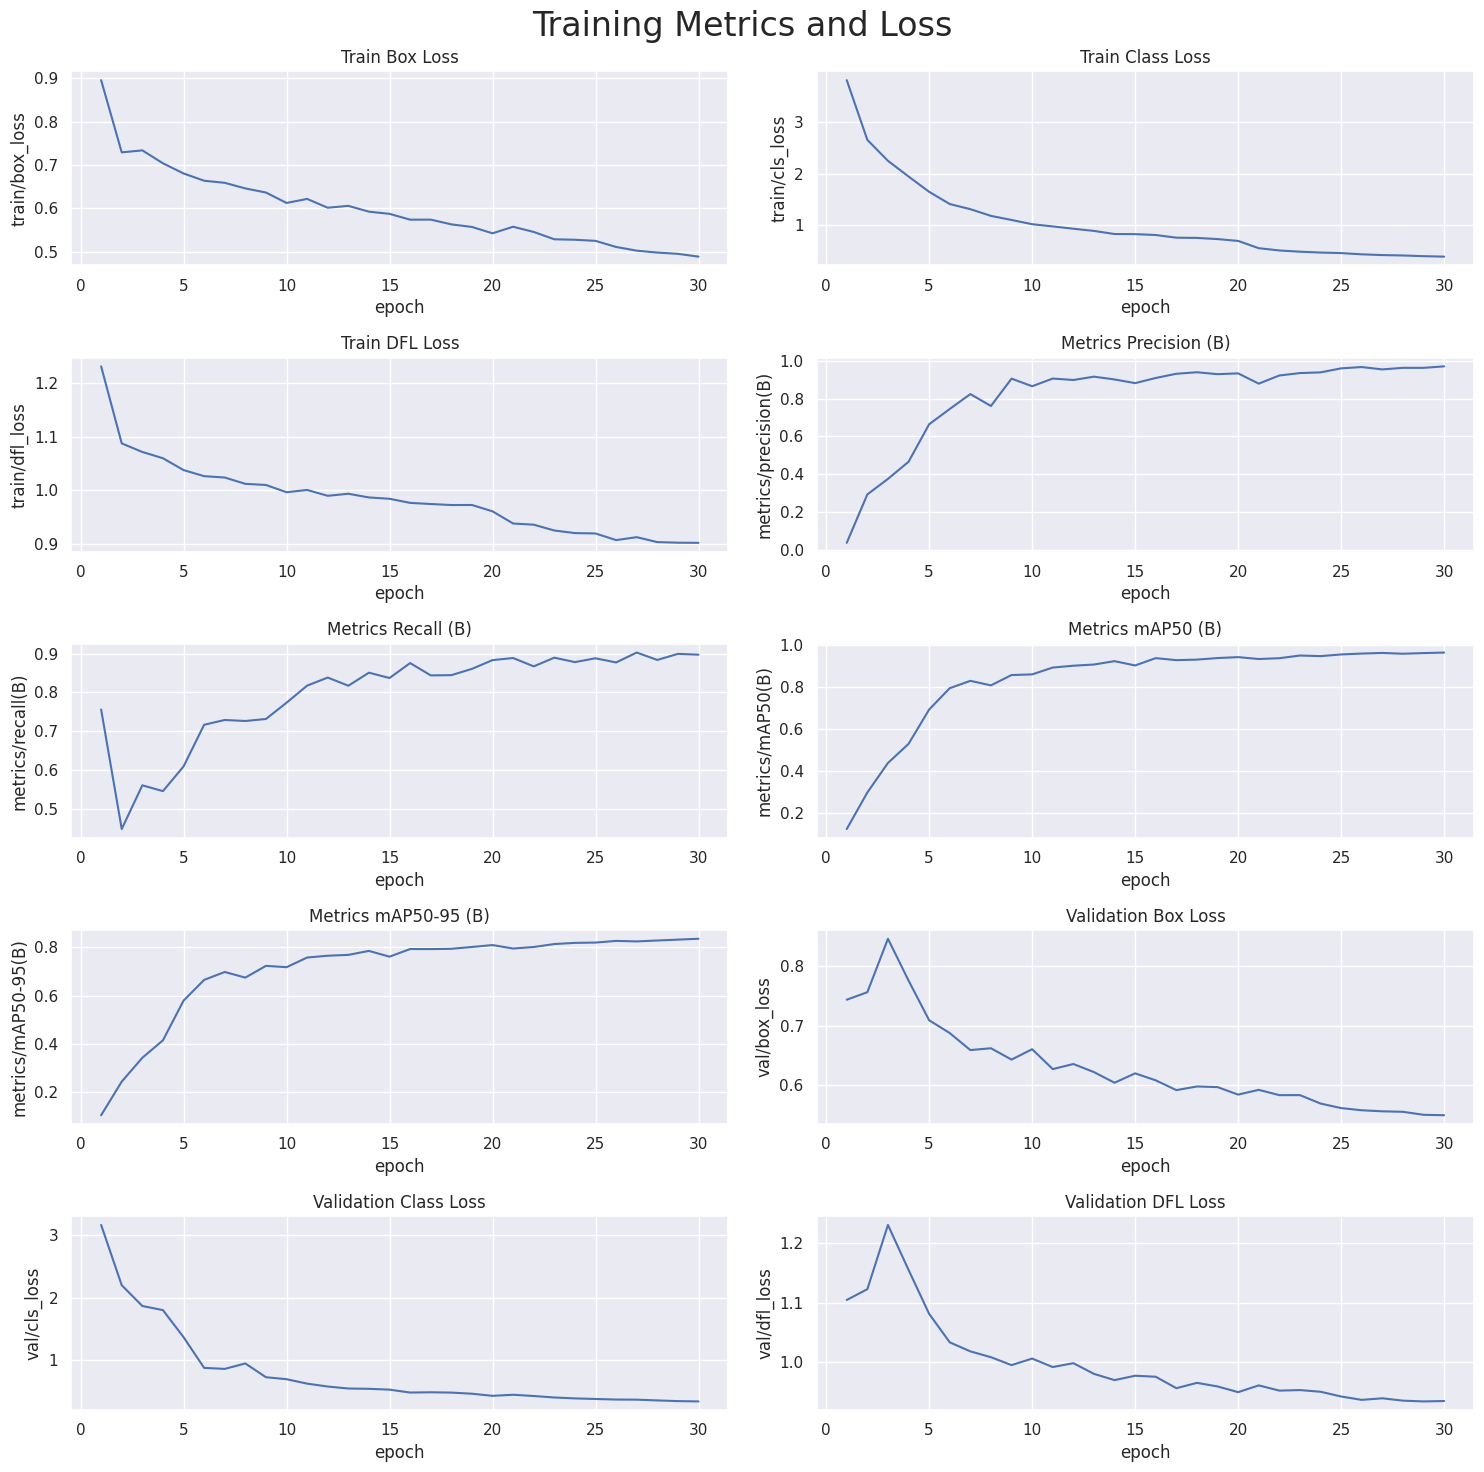

In [11]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [12]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.100 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 723.44it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:07<00:00,  6.66it/s]


                   all        801        944      0.973      0.896      0.963      0.836
           Green Light         87        122      0.931      0.689       0.85      0.511
             Red Light         74        108      0.925      0.686      0.829      0.529
       Speed Limit 100         52         52      0.966      0.923      0.985      0.893
       Speed Limit 110         17         17      0.989      0.941      0.978      0.912
       Speed Limit 120         60         60      0.988      0.983      0.992       0.92
        Speed Limit 20         56         56       0.99      0.982      0.986      0.874
        Speed Limit 30         71         74       0.96      0.959      0.986      0.927
        Speed Limit 40         53         55      0.962      0.927      0.989      0.887
        Speed Limit 50         68         71          1      0.887      0.973      0.874
        Speed Limit 60         76         76      0.976      0.921       0.97      0.884
        Speed Limit 7


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 8.5ms
Speed: 3.1ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 110, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.5ms
Speed: 2.1ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 7.4ms
Speed: 1.9ms preprocess, 7.4

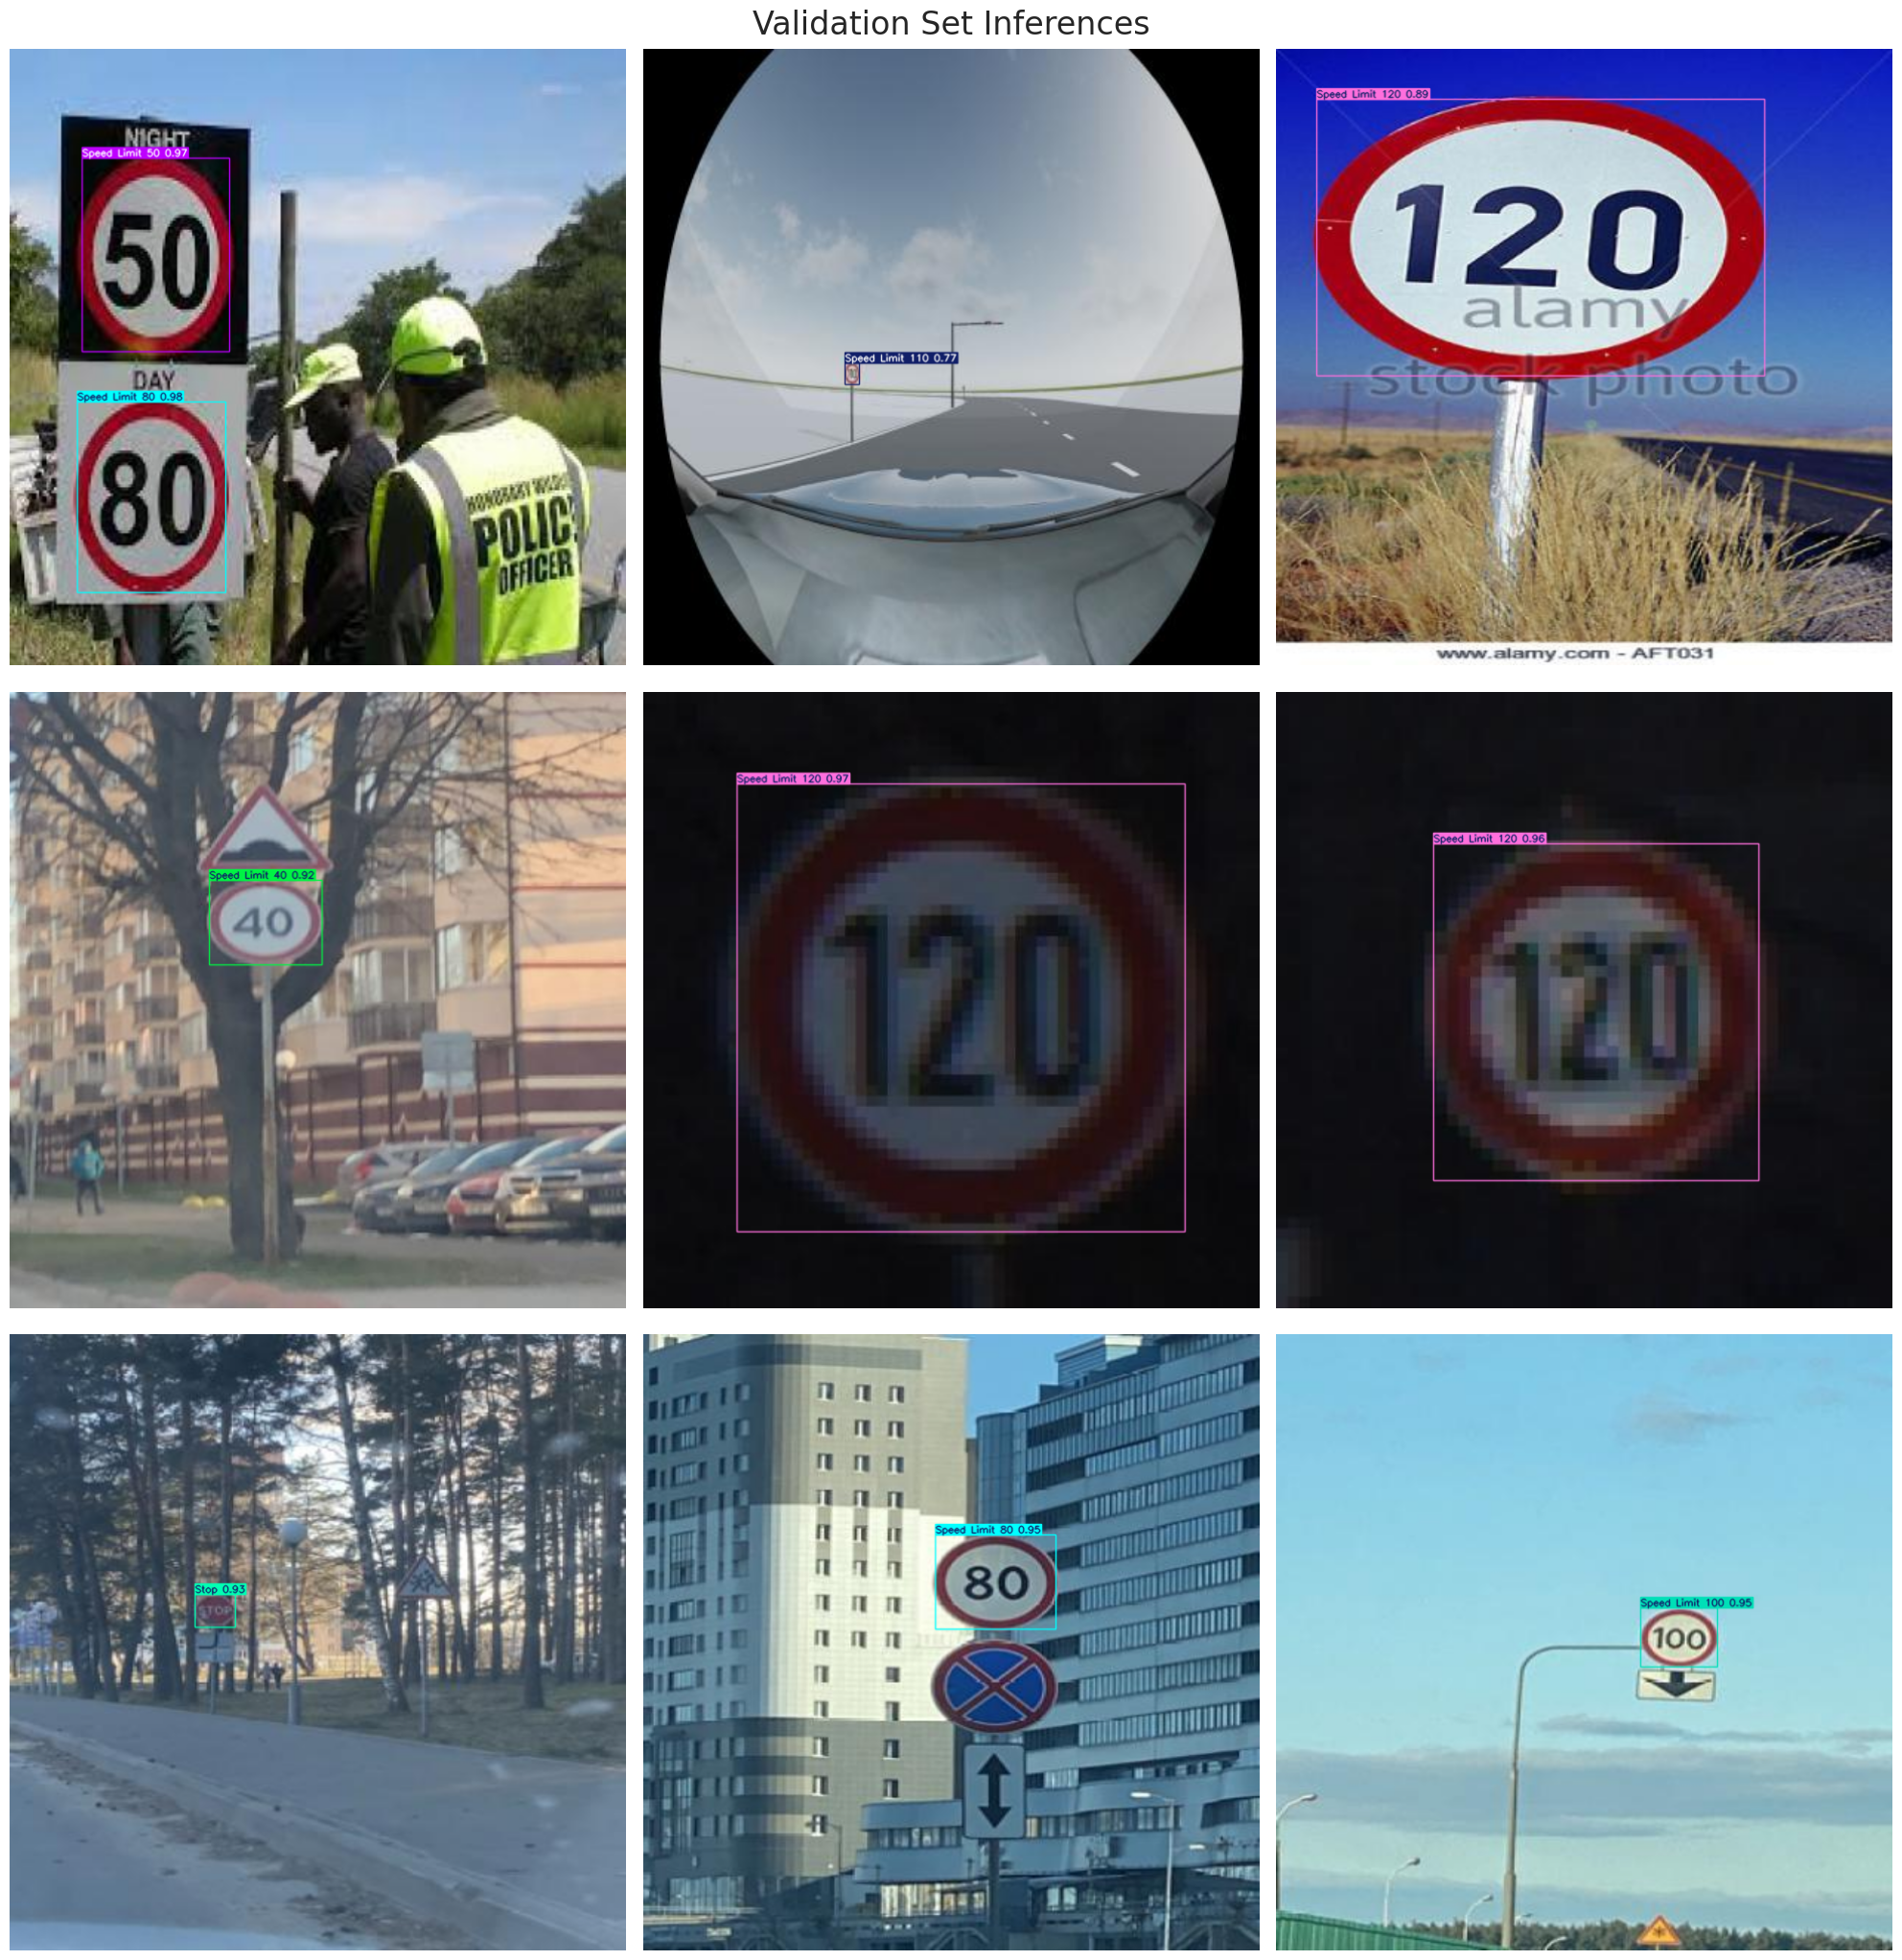

In [13]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/cardetection/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()